<a href="https://colab.research.google.com/github/FaragoFa/Emociones/blob/main/Emociones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Faragó Facundo - 114462

# Cargar repositorio

In [8]:
! git clone https://github.com/FaragoFa/Emociones.git

fatal: destination path 'Emociones' already exists and is not an empty directory.


# Importar librerias y dataset

In [29]:
import imageio      #Para leer y guardar imagenes.
import numpy as np  #Operaciones con vectores, matrices, tensores...
import matplotlib.pyplot as plt    #Para realizar graficos.
import matplotlib.image as plti    #Para guardar imagenes.
import pandas as pd #Para trabajar con datasets
import holoviews
import seaborn as sns

%matplotlib inline

#Cargo dataset
df = pd.read_excel("/content/Emociones/Encuesta Emociones 2010.xlsx")
df

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Nºencuest,Encuestador,Cuota,Fecha,Barrio,Zona,Esquina,p1.1,p.1Otra1°,p.1.2,...,VAR00002,VAR00003,VAR00004,VAR00005,VAR00006,VAR00007,VAR00008,VAR00009,VAR00010,filter_$
0,1,1.0,1,2010-10-19,15.0,1,Bustamante y Arenales,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2,1.0,6,2010-10-21,15.0,1,Juncal y Araoz,6,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,1.0,2,2010-10-22,15.0,1,French y Austria,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,4,1.0,4,2010-10-23,21.0,1,Paraná M.T. Alvear,3,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,5,1.0,3,2010-10-15,21.0,1,Cabrera y Bustamante,1,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,5.0,1,2010-11-24,2.0,3,Don Bosco y Quintino Bocayuva,5,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
138,139,11.0,6,2010-11-24,2.0,3,Mario Bravo y Guardia Vieja,1,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
139,140,11.0,9,2010-10-24,9.0,4,Salta y Pavón,3,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
140,141,NaN,9,2010-11-26,6.0,3,Ortiguera y Juan Bautista Alberdi,1,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# Funciónes

## Histograma

In [ ]:
def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

# Procesamiento

## Filtrado inicial (Relleno valores vacios con la media, luego elimino columnas con Nulls)

In [85]:
df = df.fillna(df.median())
df_filt = df.select_dtypes(['number'])
df_filt = df_filt.dropna(axis='columns')
df_filt 

<ipython-input-85-6b159d527a6f>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.median())
<ipython-input-85-6b159d527a6f>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.median())


,Nºencuest,Encuestador,Cuota,Barrio,Zona,p1.1,p.1.2,p.1.3,p.2.1,p.2.2,...,EDAD,EDADCOD,SEXO,ESTADOCI,HIJOS,NºHIJOS,EDUENCUE,EDUMADRE,EDUPADRE,filter_$
0,1,1.0,1,15.0,1,3,1,6,1,6,...,25.0,1.0,2,3,1,0.0,7,6,6,1
1,2,1.0,6,15.0,1,6,3,2,2,1,...,40.0,3.0,1,1,2,1.0,6,4,2,0
2,3,1.0,2,15.0,1,3,1,6,1,8,...,25.0,1.0,1,3,1,0.0,9,6,6,1
3,4,1.0,4,21.0,1,3,1,96,1,4,...,34.0,1.0,1,3,1,0.0,6,4,8,0
4,5,1.0,3,21.0,1,1,2,3,1,8,...,33.0,2.0,2,3,1,0.0,8,8,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,5.0,1,2.0,3,5,6,1,5,8,...,23.0,1.0,2,3,1,2.0,7,6,6,0
138,139,11.0,6,2.0,3,1,6,3,8,6,...,41.0,3.0,1,1,1,2.0,7,4,5,0
139,140,11.0,9,9.0,4,3,2,95,5,95,...,64.0,5.0,2,7,2,2.0,6,5,5,0
140,141,6.0,9,6.0,3,1,3,6,1,9,...,57.0,5.0,2,7,2,2.0,4,3,2,0


## PCA

In [107]:
from sklearn.decomposition import PCA
import numpy as np
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_cols = df_filt.columns
df_filt[df_cols] = ss.fit_transform(df_filt[df_cols])
pca1 = PCA(n_components = 142, random_state = 42)
pca_1 = pca1.fit_transform(df_filt[df_cols])
df_2 = pd.DataFrame(pca_1)
df_2.head()


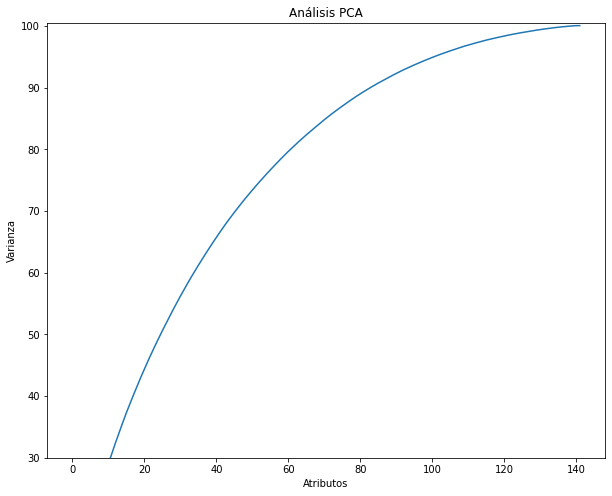

In [109]:
variance = pca1.explained_variance_ratio_
var = np.cumsum(np.round(variance, decimals=4)*100)

plt.figure(figsize=(10, 8))
plt.ylabel('Varianza')
plt.xlabel('Atributos')
plt.title('Análisis PCA')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')
plt.plot(var)
plt.show()

Con 60 componentes obtengo practicamente el 80% de la varianza

In [118]:
pca1 = PCA(n_components = 60, random_state = 42)
pca_1 = pca1.fit_transform(df_filt[df_cols])
df_2 = pd.DataFrame(pca_1)
df_2.head()
variance = pca1.explained_variance_ratio_
variance.sum()

0.7905627514773108

## Matriz de correlacion

In [ ]:
corr = df_2.corr()

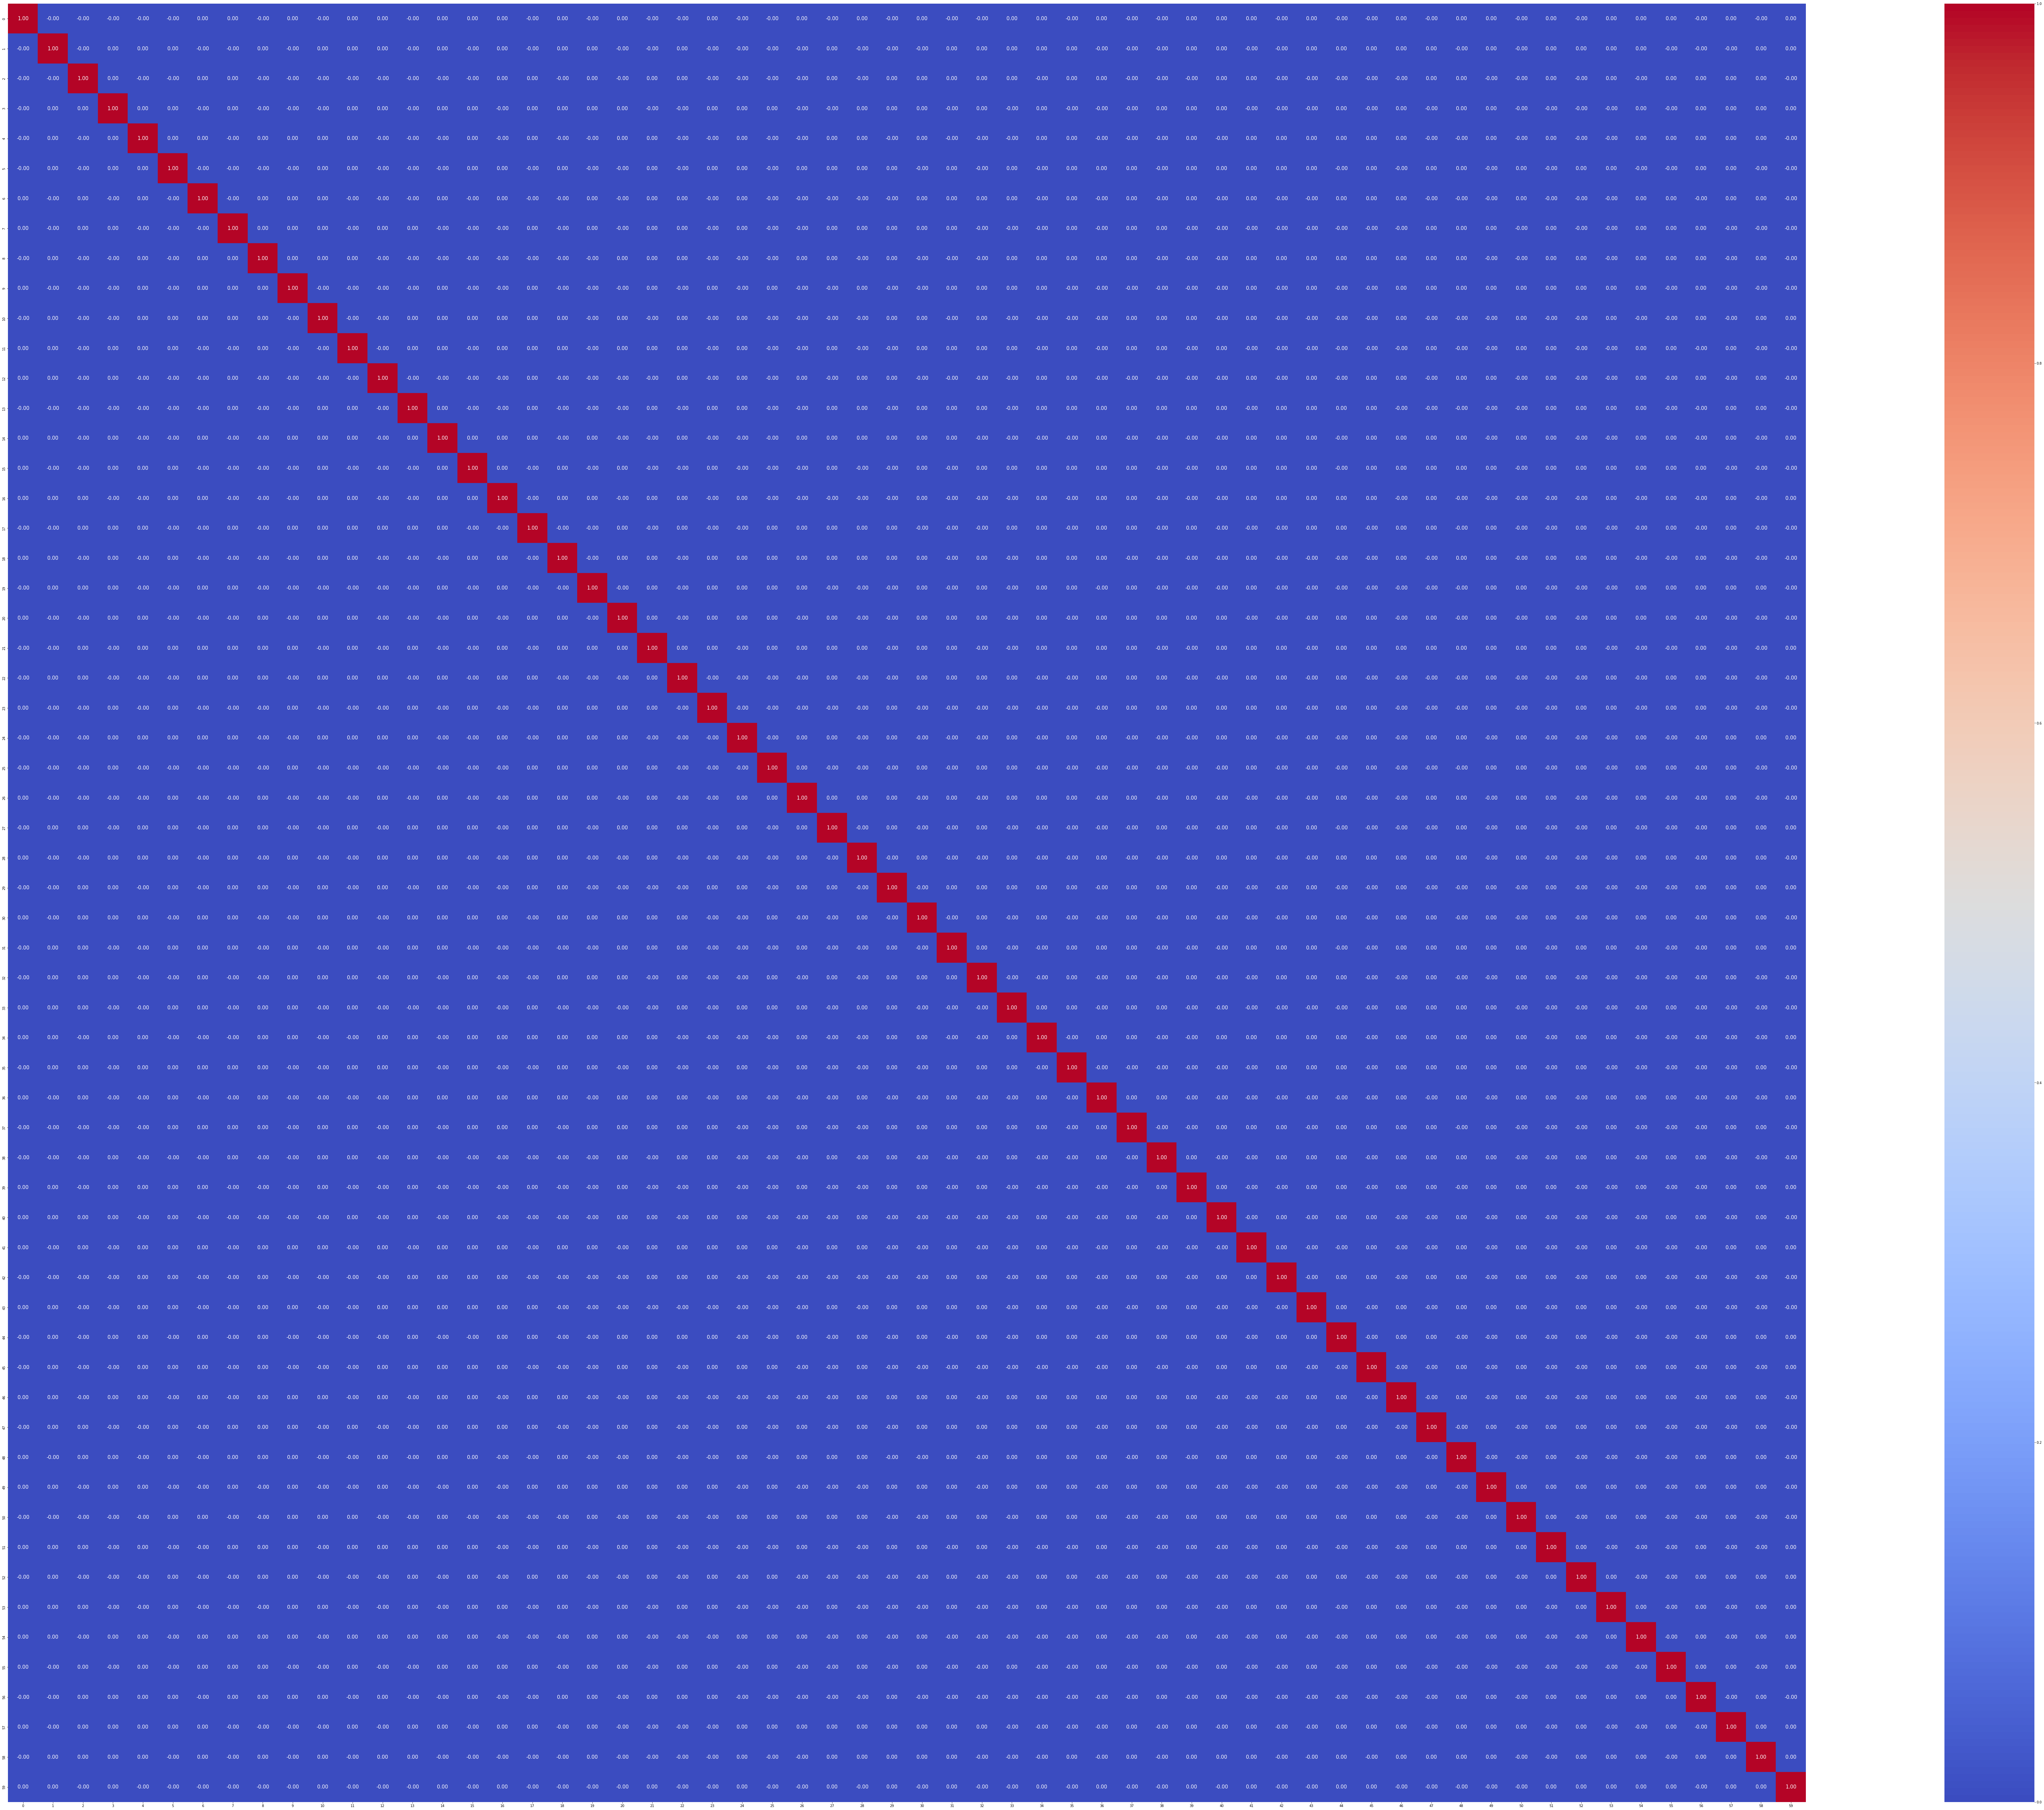

In [128]:
plt.figure(figsize=(150,100))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

## Histogramas

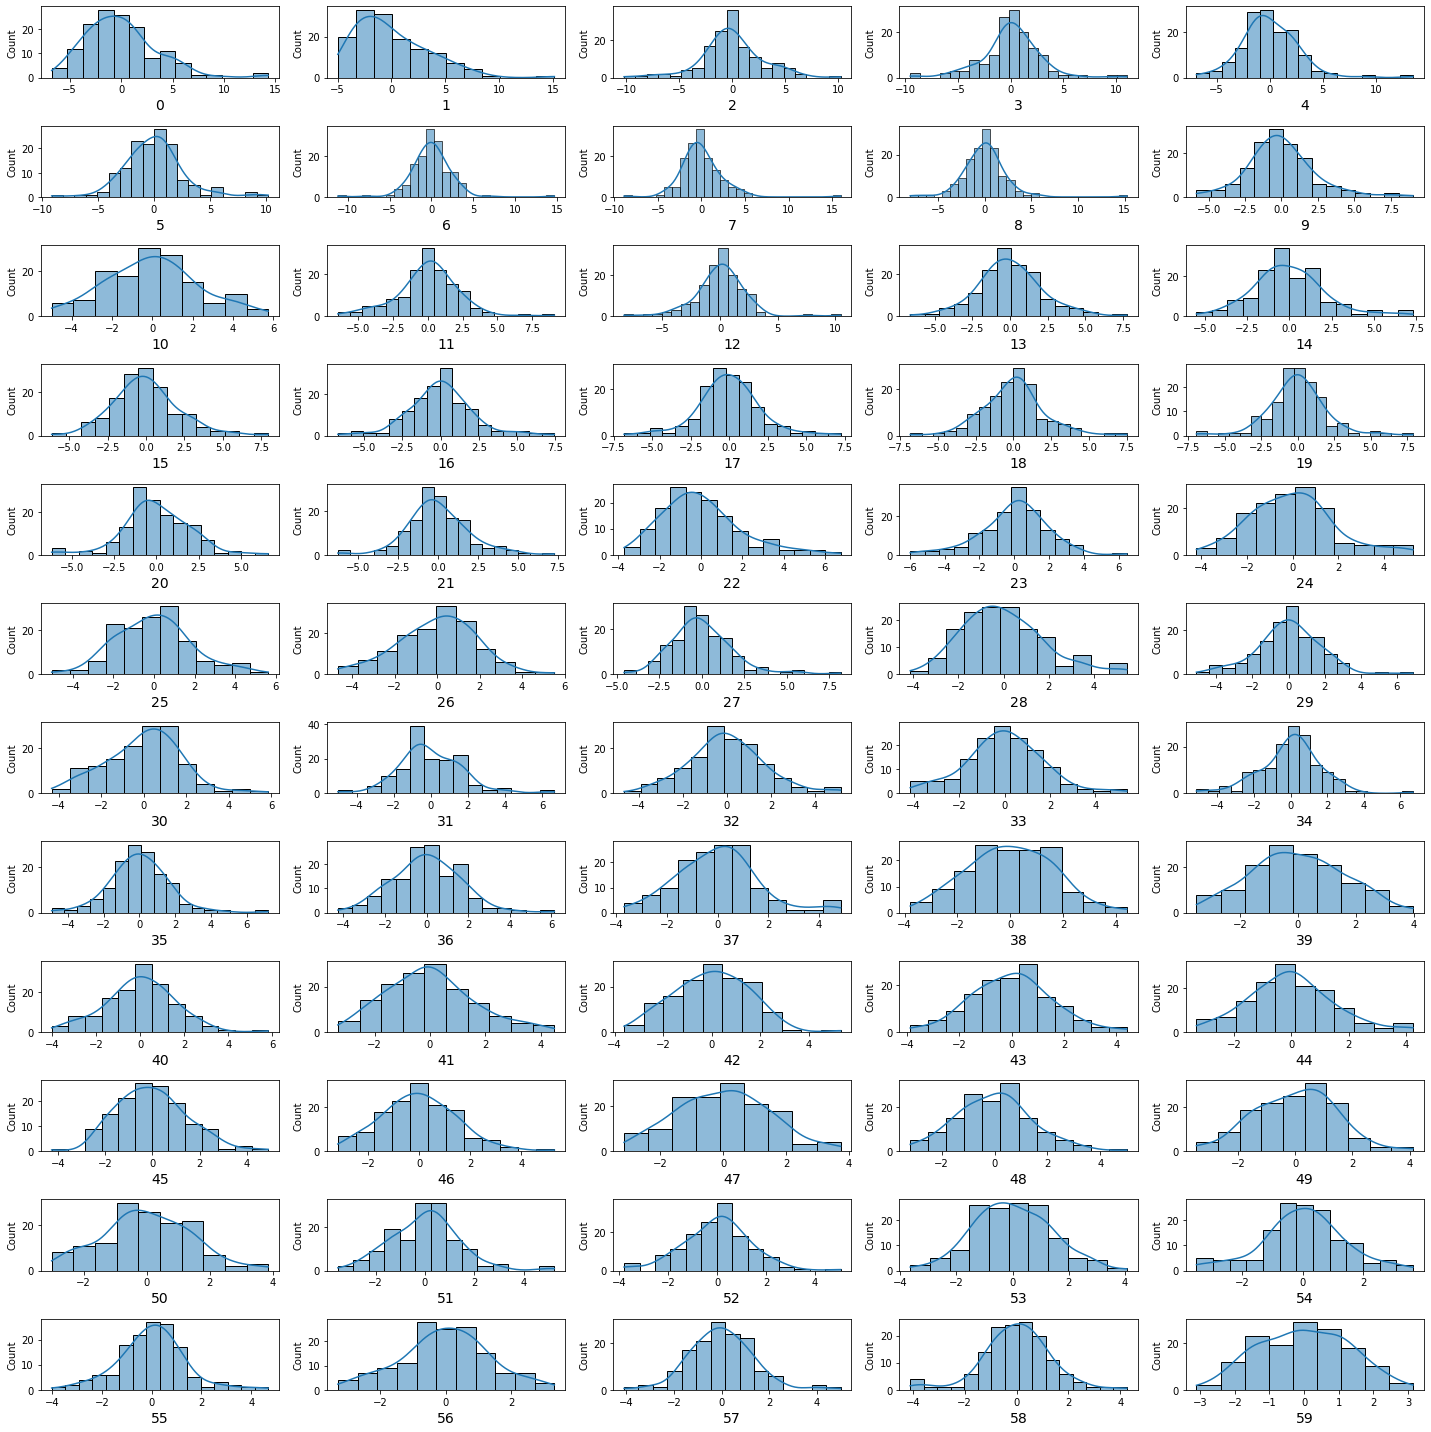

In [131]:
plt.figure(figsize = (20, 20))
i=0

for column in df_2:  
    i+=1   
    if i <= 61:
        ax = plt.subplot(12, 5, i)
        sns.histplot(df_2[column],kde=True)
        plt.xlabel(column, fontsize = 14)
       
    
    
plt.tight_layout()
plt.show()